In [1]:
from random import *
import numpy as np
from scipy.stats import truncnorm
from operator import add
from functools import reduce

seed (100)

## Global variables
global N, NUM_OF_ITERATION
global STATE0, STATE1, STATE2, STATE3, STATE4, STATE5, STATE6, STATE7
global BASE, OPT
global TDM, GREEDY, GENERIC
global iCache, dCache
global PROB

global TDM_OPT, GREEDY_OPT, GENERIC_OPT
global OPT_LIST
global METHOD
global STATE_COUNT

## Instantiating global variables
## N is the total number of cycles the process runs for
N = 10000000

## Number of iterations for the complete run
## 10000 takes around 2 min to run
NUMBER_OF_ITERATION = 2

## BASE list has all the base cycle values that were generated
## OPT list has the optimized values for that cycle post optimization
BASE = []
OPT = []

## States
STATE0 = {'meanCycle': 8000, 'stdDev': 1000, 'min': 2500, 'max': 11500, 'base': BASE, 'opt': OPT}
STATE1 = {'meanCycle': 5500, 'stdDev': 1000, 'min': 4500, 'max': 6500, 'base': BASE, 'opt': OPT}
STATE2 = {'meanCycle': 3500, 'stdDev': 1000, 'min': 3000, 'max': 4000, 'base': BASE, 'opt': OPT}
STATE3 = {'meanCycle': 50000, 'stdDev': 10000, 'min': 45000, 'max': 55000, 'base': BASE, 'opt': OPT}
STATE4 = {'meanCycle': 40000, 'stdDev': 1000, 'min': 35000, 'max': 55000, 'base': BASE, 'opt': OPT}
STATE5 = {'meanCycle': 45000, 'stdDev': 10000, 'min': 40000, 'max': 50000, 'base': BASE, 'opt': OPT}
STATE6 = {'meanCycle': 70000, 'stdDev': 1000, 'min': 65000, 'max': 105000, 'base': BASE, 'opt': OPT}
STATE7 = {'meanCycle': 55000, 'stdDev': 1000, 'min': 35000, 'max': 95000, 'base': BASE, 'opt': OPT}


## name key added to ##M print the name
TDM = {'name': 'TDM', 'freqSampling': 2000, 'lat': 500, 'stdDev': 20, 'quality': 0.7}
GREEDY = {'name': 'GREEDY', 'freqSampling': 5000, 'lat': 1000, 'stdDev': 100, 'quality': 0.9}
GENERIC = {'name': 'GENERIC', 'freqSampling': 10000, 'lat': 2000, 'stdDev': 500, 'quality': 1}

## CycleRatio ==> is the percentage of cycles that the technique uses from the total cycles
iCache = {'name': 'iCahche', 'lat': 250, 'stdDev': 10, 'quality': 0.2, 'cycleRatio': 0.08}
dCache = {'name': 'dCache', 'lat': 400, 'stdDev': 50, 'quality': 0.3, 'cycleRatio': 0}
ROB = {'name': 'ROB', 'lat': 300, 'stdDev': 50, 'quality': 0.1, 'cycleRatio': 0.27}
IQ = {'name': 'IQ', 'lat': 400, 'stdDev': 50, 'quality': 0.1, 'cycleRatio': 0.65}

## techList is the list containing all the techniques 
## it is fed into the getOptCycles to get the configuration time for the max of the techniques
techList = [iCache, dCache, ROB, IQ]

## Clearing the global opt lists
TDM_OPT = []
GREEDY_OPT = []
GENERIC_OPT = []

## Create OPT_LIST contains the speedup for all the variations of techniques
OPT_LIST = [TDM_OPT, GREEDY_OPT, GENERIC_OPT]

## Create a list of methods, do not create strings 'TDM' XX
METHOD = [TDM, GREEDY, GENERIC]

## State Count 
STATE_COUNT = {'state0': 0, 'state1': 0, 'state2': 0, 'state3': 0, 'state4': 0, 'state5': 0, 'state6': 0,\
              'state7': 0}
## This list is not need as we have encoded the techniques in 
## the getOptCycles using the getActiveTech function
#TECH = [iCache, dCache]

## logFile contains the information about the runs
logFile = '../log/soplex_trial2_1.txt'

## imgFile points to the image file name for the run
imgFile = '../result/soplex_trial2_1.png'

## Csv file 
benchmark = 'soplex_trial2_1'
csvFile = '../result/allBenchmarks.csv'
## --------------------------------------------------------------- ##

def state_0():
    ##Dprint "State_0"
    STATE_COUNT['state0'] = STATE_COUNT['state0'] + 1
    
    ## Lets take that the mean values of cycles in state0 is 50000 and std Dev is 5000
    global STATE0, BASE, OPT
    
    baseCycles = round(getTruncatedNormal(STATE0['meanCycle'], STATE0['stdDev'],\
                                         STATE0['min'], STATE0['max']))
    BASE.append(baseCycles)
    
    ##MwriteStr = "State0 " + str(baseCycles) + "\n"
    ##Mf.write(writeStr)
    
    ##Dprint "Opt Cycle Satrt: 0\n"
    ## For the first iteration we need to start with time=0
#     if (len(BASE) == 1):
#         optStateCycles = getOptCycles(baseCycles, 0, TDM, techList, getActiveTech(10))
#     else:
#         ## startCycles for next iteration is the baseCycle from previous state
#         optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), TDM, techList, getActiveTech(10))
    
#     OPT.append(optStateCycles)
    
    ## 
    #for i in range(len(BASE)):
        ###M print "BASE[%d] = %f" %(i, BASE[i])
    
    ## ------------- Wrong way to code ---------------##
#     print "Before Entering if loop: State0\n"
#     if random() <= 0.5:
#         print"State0_1\n"
#         return state_1
#     elif random() > 0.5:
#         print"State0_0\n"
#         return state_0
#     else: ## else is very important, otherwise the code is breaking even if you consider all the scenarios
#         print"Default: 0\n"
#         return state_0
#     elif random() > 0.6:
#         print"State0_3\n"
#         return state_3

    ## ------------------- Correct Way ------------------##
    rand = random()
#     if rand <= 0.4:
#         return state_0
#     elif rand > 0.4 and rand <= 0.8:
#         return state_1
#     elif rand > 0.8 and rand <= 0.9:
#         return state_2
#     elif rand > 0.9:
#         return state_3
    
    return returnState(rand)
    
def state_1():
    ##Dprint "State_1"
    STATE_COUNT['state1'] = STATE_COUNT['state1'] + 1
    ##
    global STATE1, BASE, OPT
    
    ## baseCycles for the state at the current execution time
    ## random number from the normal distribution with mean=STATE1['meanCycle']
    ## and stdDev = STATE1['stdDev']
    #baseCycles = round(np.random.normal(STATE1['meanCycle'], STATE1['stdDev']))
    baseCycles = round(getTruncatedNormal(STATE1['meanCycle'], STATE1['stdDev'],\
                                         STATE1['min'], STATE1['max']))
    BASE.append(baseCycles)
    
    ##MwriteStr = "State1 " + str(baseCycles) + "\n"
    ##Mf.write(writeStr)
    ##Dprint "Opt Cycle Satrt: 1\n"
#     if (len(BASE) == 1):
#         optStateCycles = getOptCycles(baseCycles, 0, TDM, techList, getActiveTech(10))
#     else:
#         optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), TDM, techList, getActiveTech(10))
    
#     OPT.append(optStateCycles)
    
    #for i in range(len(BASE)):
        ###M print "BASE[%d]= %f" %(i, BASE[i])
    
    ##Dprint "Before Entering if loop: State1\n"    
    ## Do not create random number in the comparison 
    ## create a variable with random() and then check for the condition
    ## if you do if random() elif random() => these are both generating different random numbers
    ## and can break your code even if you consider all the possibilities, since each number get generated 
    ## independently of each other.
    ## Wrong way to code
#     if random() <= 0.5:
#         print"State1_0\n"
#         return state_0
#     elif random() > 0.5:
#         print"State1_1\n"
#         return state_1
#     else:
#         print"Default: 1\n"
#         return state_1
    
    rand = random()
#     if rand <= 0.4:
#         return state_0
#     elif rand > 0.4 and rand <= 0.8:
#         return state_1
#     elif rand > 0.8 and rand <= 0.9:
#         return state_2
#     elif rand > 0.9:
#         return state_3

    return returnState(rand)
    
def state_2():
    ##M print "State_2"
    ##
    STATE_COUNT['state2'] = STATE_COUNT['state2'] + 1
    global STATE2, BASE, OPT
    
    baseCycles = round(getTruncatedNormal(STATE2['meanCycle'], STATE2['stdDev'],\
                                         STATE2['min'], STATE2['max']))
    BASE.append(baseCycles)
    
#     if (len(BASE) == 1):
#         optStateCycles = getOptCycles(baseCycles, 0, TDM, techList, getActiveTech(10))
#     else:
#         optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), TDM, techList, getActiveTech(10))
    
#     OPT.append(optStateCycles)
    
    ##MwriteStr = "State2 " + str(baseCycles) + "\n"
    ##Mf.write(writeStr)
    
    rand = random()
    return returnState(rand)

def state_3():
    ##M print "State_3"
    STATE_COUNT['state3'] = STATE_COUNT['state3'] + 1
    ##
    global STATE3, BASE, OPT
    
    baseCycles = round(getTruncatedNormal(STATE3['meanCycle'], STATE3['stdDev'],\
                                         STATE3['min'], STATE3['max']))
    BASE.append(baseCycles)
    
    ##MwriteStr = "State3 " + str(baseCycles) + "\n"
    ##Mf.write(writeStr)
    
#     if (len(BASE) == 1):
#         optStateCycles = getOptCycles(baseCycles, 0, TDM, techList, getActiveTech(10))
#     else:
#         optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), TDM, techList, getActiveTech(10))
    
#     OPT.append(optStateCycles)
    
    rand = random()
    return returnState(rand)

def state_4():
    ##M print "State_4"
    STATE_COUNT['state4'] = STATE_COUNT['state4'] + 1
    ##
    global STATE4, BASE, OPT
    
    baseCycles = round(getTruncatedNormal(STATE4['meanCycle'], STATE4['stdDev'],\
                                         STATE4['min'], STATE4['max']))
    BASE.append(baseCycles)
    
    ##MwriteStr = "State3 " + str(baseCycles) + "\n"
    ##Mf.write(writeStr)
    
#     if (len(BASE) == 1):
#         optStateCycles = getOptCycles(baseCycles, 0, TDM, techList, getActiveTech(10))
#     else:
#         optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), TDM, techList, getActiveTech(10))
    
#     OPT.append(optStateCycles)
    
    rand = random()
    return returnState(rand)

def state_5():
    ##M print "State_5"
    STATE_COUNT['state5'] = STATE_COUNT['state5'] + 1
    ##
    global STATE5, BASE, OPT
    
    baseCycles = round(getTruncatedNormal(STATE5['meanCycle'], STATE5['stdDev'],\
                                         STATE5['min'], STATE5['max']))
    BASE.append(baseCycles)
    
    ##MwriteStr = "State3 " + str(baseCycles) + "\n"
    ##Mf.write(writeStr)
    
#     if (len(BASE) == 1):
#         optStateCycles = getOptCycles(baseCycles, 0, TDM, techList, getActiveTech(10))
#     else:
#         optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), TDM, techList, getActiveTech(10))
    
#     OPT.append(optStateCycles)
    
    rand = random()
    return returnState(rand)

def state_6():
    ##M print "State_6"
    STATE_COUNT['state6'] = STATE_COUNT['state6'] + 1
    ##
    global STATE6, BASE, OPT
    
    baseCycles = round(getTruncatedNormal(STATE6['meanCycle'], STATE6['stdDev'],\
                                         STATE6['min'], STATE6['max']))
    BASE.append(baseCycles)
    
    ##MwriteStr = "State3 " + str(baseCycles) + "\n"
    ##Mf.write(writeStr)
    
#     if (len(BASE) == 1):
#         optStateCycles = getOptCycles(baseCycles, 0, TDM, techList, getActiveTech(10))
#     else:
#         optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), TDM, techList, getActiveTech(10))
    
#     OPT.append(optStateCycles)
    
    rand = random()
    return returnState(rand)

def state_7():
    ##M print "State_7"
    STATE_COUNT['state7'] = STATE_COUNT['state7'] + 1
    ##
    global STATE7, BASE, OPT
    
    baseCycles = round(getTruncatedNormal(STATE7['meanCycle'], STATE7['stdDev'],\
                                         STATE7['min'], STATE7['max']))
    BASE.append(baseCycles)
    
    ##MwriteStr = "State3 " + str(baseCycles) + "\n"
    ##Mf.write(writeStr)
    
#     if (len(BASE) == 1):
#         optStateCycles = getOptCycles(baseCycles, 0, TDM, techList, getActiveTech(10))
#     else:
#         optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), TDM, techList, getActiveTech(10))
    
#     OPT.append(optStateCycles)
    
    rand = random()
    return returnState(rand)


## Define the state function return for each state beased on the pobabilities
def returnState(randVar):
    if randVar <= 0.486:
        return state_0
    elif randVar > 0.486 and randVar <= 0.686:
        return state_1
    elif randVar > 0.686 and randVar <= 0.956:
        return state_2
    elif randVar > 0.956 and randVar <= 0.976:
        return state_3
    elif randVar > 0.976 and randVar <= 0.986:
        return state_4
    elif randVar > 0.986 and randVar <= 0.990:
        return state_5
    elif randVar > 0.990 and randVar <= 0.995:
        return state_6
    elif randVar > 0.995 and randVar <= 1:
        return state_7

    
## Other functions
## get the techniques that are active for a given simulation
def getActiveTech(x):
    if (x == 0):
        return (0, 0, 0, 0)
    elif (x==1):
        return (0, 0, 0, 1)
    elif (x==2):
        return (0, 0, 1, 0)
    elif (x==3):
        return (0, 0, 1, 1)
    elif (x==4):
        return (0, 1, 0, 0)
    elif (x==5):
        return (0, 1, 0, 1)
    elif (x==6):
        return (0, 1, 1, 0)
    elif (x==7):
        return (0, 1, 1, 1)
    elif (x==8):
        return (1, 0, 0, 0)
    elif (x==9):
        return (1, 0, 0, 1)
    elif (x==10):
        return (1, 0, 1, 0)
    elif (x==11):
        return (1, 0, 1, 1)
    elif (x==12):
        return (1, 1, 0, 0)
    elif (x==13):
        return (1, 1, 0, 1)
    elif (x==14):
        return (1, 1, 1, 0)
    elif (x==15):
        return (1, 1, 1, 1)

###############################################

## sum() => internal function can also be used
## Usage sum(list)
def getTotalCycles(list1, index):
    tot = 0
    for i in range(index):
        tot = tot + list1[i]
    return tot

###############################################

## getOptCycles takes in input basecycle, time at which the state started,
## method and technique applied and returns the optimized time for that state, that method 
## and technique

## baseCycles => is generated randomly based on mean and variance for a state
## startCycles => is the time at which the previous state finished. Start of this state in globale
## time
## method => method, TDM, GREEDY, GENERIC
## method['lat'] => gives the latency time for the method
## techList => technique applied, iCache, dCache, ROB etc. Used to get config time for 
##          all the techniques and max will be used for process
## activeTech ==> is the tuple with the active techniques 

def getOptCycles(baseCycles, startCycles, method, techList, activeTech):
    ###M print "method= %s\n%s['freqSampling'] = %d" %(method, method, method['freqSampling'])
    ###M print "Type of Method = %s" %(type(method))
    samplingRate = method['freqSampling']
    
    ## samplingTime is the time in the state where the technique will sample for optimisation
    ## If the startCyles is 0 => Starting the simulation
    ## startCycles is divisible by sampling rate => We discussed to go on to the next 
    ## sampling cycle
    if (startCycles % samplingRate == 0 or startCycles == 0):
        samplingTime = samplingRate
    elif (startCycles % samplingRate != 0):
        ## Since we know the starting time, we divide it by samplingRate to see how much 
        ## it is above the samplingRate. Now we subtract it from the samplingRate to get 
        ## how further down will the next sampling be done.
        ## We multiply 2*samplingRate since the program will take at least freqSampling
        ## to optimize.
        #samplingTime = startCycles + (samplingRate - np.remainder(startCycles, samplingRate))
        ## For this run we assume the sampling point can be the first sampling point and need 
        ## not wait for the next sampling point. One more assumption is that the latency 
        ## should account for the time it needs to configure the state variables for optimization
        ## Because of thois we use 1*samplingRate - ....
        samplingTime = (1*samplingRate) - np.remainder(startCycles, samplingRate)
    
    if (samplingTime > baseCycles):
        ##M print "Sampling Time greater than baseCycles ==> No optimisation possible\n"
        ##M print "baseCycles= %d\nsamplingTime= %d\n" %(baseCycles, samplingTime)
        return baseCycles
    else:
        ## globalSamplingTime => Gives the sampling time with respect to global time
        globalSamplingTime = startCycles + samplingTime

        ## optTime => Represents the time taken by method to optimize
        optTime = round(np.random.normal(method['lat'], method['stdDev']))

        ## configTimeList => Represents the list of time taken by technique to configure
        #configTime = round(np.random.normal(tech['lat'], tech['stdDev']))
        configTimeList = []
        for ii in range(len(techList)):
            configTimeList.append(round(np.random.normal(techList[ii]['lat'], techList[ii]['stdDev'])))
        
        ## configTime is the max of all the cpnfiguration times required, since they can happen in parallel
        configTime = max(configTimeList)

        ## timeleft => Represents the time left after sampling and optimisation and configuration time
        timeLeft = baseCycles - (samplingTime + optTime + configTime)
        if (timeLeft < 0):
            ##M print "Cannot optimize because there is no time left for optimisation\n"
            ##M print "timeLeft < 0\n"
            ##M print "baseCycles= %d\nstartCycles= %d\nsamplingTime= %d\nglobalSamplingTime=%d\noptTime= %d\
        ##M\nconfigTime= %d\ntimeLeft= %d\n"\
        ##M% (baseCycles, startCycles, samplingTime, globalSamplingTime, optTime, \
        ##M   configTime, timeLeft)
            return baseCycles
        
        else:
            ## this time is now optimized according to the method
            ##opt_timeLeft = round(method['quality']*timeLeft)
            a1 = activeTech[0]
            a2 = activeTech[1]
            a3 = activeTech[2]
            a4 = activeTech[3]
#             opt_timeLeft = round(timeLeft*method['quality']*(a1*iCache['cycleRatio']*(1-iCache['quality']) + \
#                                           a2*dCache['cycleRatio']*(1-dCache['quality']) + \
#                                           a3*ROB['cycleRatio']*(1-ROB['quality']) + \
#                                           a4*IQ['cycleRatio']*(1-IQ['quality']) \
#                                           ) + \
#                                 timeLeft*(1-(a1*iCache['cycleRatio'] +\
#                                            a2*dCache['cycleRatio'] +\
#                                            a3*ROB['cycleRatio'] +\
#                                            a4*IQ['cycleRatio'])\
#                                         )\
#                                 )
            
            opt_timeLeft = round(timeLeft*(a1*iCache['cycleRatio']*((1-iCache['quality']) + iCache['quality']*(1-method['quality'])) +\
                                          a2*dCache['cycleRatio']*((1-dCache['quality']) + dCache['quality']*(1-method['quality']) ) +\
                                          a3*ROB['cycleRatio']*((1-ROB['quality']) + ROB['quality']*(1-method['quality']) ) +\
                                          a4*IQ['cycleRatio']*((1-IQ['quality']) + IQ['quality']*(1-method['quality']) )  
                                          ) + \
                                timeLeft*(1-(a1*iCache['cycleRatio'] +\
                                           a2*dCache['cycleRatio'] +\
                                           a3*ROB['cycleRatio'] +\
                                           a4*IQ['cycleRatio'])\
                                        )\
                                ) 


            newStateCycles = samplingTime + optTime + configTime + opt_timeLeft

            ##M print "\nbaseCycles= %d\nstartCycles= %d\nsamplingTime= %d\nglobalSamplingTime=%d\noptTime= %d\
            ##M\nconfigTime= %d\ntimeLeft= %d\nopt_timeLeft=%d\nnewStateCycles= %d\n"\
            ##M% (baseCycles, startCycles, samplingTime, globalSamplingTime, optTime, \
            ##M   configTime, timeLeft, opt_timeLeft, newStateCycles)
            
            ##M print "\tiCache= %d, %d\n\tdCAche= %d, %d\n\tROB= %d, %d\n\tIQ= %d, %d\n" \
            ##M%(round(method['quality']*timeLeft*a1*iCache['cycleRatio']*(1-iCache['quality'])), round(timeLeft*iCache['cycleRatio']),\
            ##M  round(method['quality']*timeLeft*a2*dCache['cycleRatio']*(1-dCache['quality'])), round(timeLeft*dCache['cycleRatio']),\
            ##M  round(method['quality']*timeLeft*a3*ROB['cycleRatio']*(1-ROB['quality'])), round(timeLeft*ROB['cycleRatio']),\
            ##M  round(method['quality']*timeLeft*a4*IQ['cycleRatio']*(1-IQ['quality'])), round(timeLeft*IQ['cycleRatio'])\
            ##M )

            ## returning the optimized time the state takes because of the technique and method applied
            return newStateCycles

#######################################################    

## getTruncatedNormal gets random number by normal distribution within 'low' and 'up' given
## the mean and standard deviation of the numbers.
## rvs ==> is random variable continuous 
## Refer ==> https://stackoverflow.com/questions/36894191/how-to-get-a-normal-distribution-within-a-range-in-numpy

def getTruncatedNormal (mean, stdDev, low, up):
    return truncnorm ((low-mean)/stdDev, (up-mean)/stdDev, loc=mean, scale=stdDev).rvs()

###M print "truncated Normal number between %d and %d with mean=%d and stdDev = %d is %d"\
#% (numMin, numMax, numMean, numSd, getTruncatedNormal(numMean, numSd, numMin, numMax).rvs() )    
################

print ("States and functions instantiated")
## ------------------------------------------------------------- ##


States and functions instantiated


In [2]:
# # global variables
# # create OPT list for each Method
# from operator import add

# global TDM_OPT, GREEDY_OPT, GENERIC_OPT
# global OPT_LIST
# global METHOD
# global NUM_OF_ITERATION

# TDM_OPT = []
# GREEDY_OPT = []
# GENERIC_OPT = []

# ## Create OPT_LIST contains the speedup for all the variations of techniques
# OPT_LIST = [TDM_OPT, GREEDY_OPT, GENERIC_OPT]

# ## name key added to print the name
# TDM = {'name': 'TDM', 'freqSampling': 2000, 'lat': 500, 'stdDev': 20, 'quality': 0.8}
# GREEDY = {'name': 'GREEDY', 'freqSampling': 4000, 'lat': 1500, 'stdDev': 100, 'quality': 0.9}
# GENERIC = {'name': 'GENERIC', 'freqSampling': 20000, 'lat': 5000, 'stdDev': 500, 'quality': 1}

# ## CycleRatio ==> is the percentage of cycles that the technique uses from the total cycles
# iCache = {'name': 'iCahche', 'lat': 250, 'stdDev': 10, 'quality': 0.2, 'cycleRatio': 0.6}
# dCache = {'name': 'dCache', 'lat': 400, 'stdDev': 50, 'quality': 0.3, 'cycleRatio': 0.1}
# ROB = {'name': 'ROB', 'lat': 300, 'stdDev': 50, 'quality': 0.1, 'cycleRatio': 0.1}
# IQ = {'name': 'IQ', 'lat': 400, 'stdDev': 50, 'quality': 0.1, 'cycleRatio': 0.2}

# ## techList is the list containing all the techniques 
# ## it is fed into the getOptCycles to get the configuration time for the max of the techniques
# techList = [iCache, dCache, ROB, IQ]

# ## Create a list of methods, do not create strings 'TDM' XX
# METHOD = [TDM, GREEDY, GENERIC]

# ## This list is not need as we have encoded the techniques in 
# ## the getOptCycles using the getActiveTech function
# #TECH = [iCache, dCache]

# ## Number of iterations for the complete run
# ## 10000 takes around 2 min to run
# NUMBER_OF_ITERATION = 10  

###############################################################################
## BASE is empty and and is will contain the base numbers of the states
## optList has the empty list to which the optCycles will be appended
## optList = [pdmList, greedyList, genericList]
def runMCF(BASE, optList):
    state = state_0

    count = 0

    while state:
        state = state()
        ## when the sum of base goes above N we stop
        ## Stops close to the maximum number of cycles that we want to execute
        if sum(BASE) > N:
            ## state => None. while loop stops
            ##Dprint"sum(BASE)= %d, N= %d\nBASE= %s\n" %(sum(BASE), N, BASE)
            state = None
    
    ##Dprint"\nBASE2 = %s, Sum= %d\n" %(BASE, sum(BASE))
    wrStr = "Base Length: " + str(len(BASE)) + " , Base Sum: " + str(sum(BASE)) + "\n"
    f.write(wrStr)
    # ##M => Commented last to refrain from seeing all the debuggin outputs
    ##Mprint "\ntype of BASE = %s\n" %(type(BASE))
    #totalBaseCycles = getTotalCycles(BASE, len(BASE))

    ##Mfor i in range(len(BASE)):
    ##M    print "BASE[%d]= %d, OPT[%d]=%d" %(i, BASE[i], i, OPT[i])

    #print "\nTotal Base Cycles = %d" %(totalBaseCycles)

    ### 
    #getOptCycles(BASE[1], BASE[0], TDM, iCache)

    ##Mprint "\nTotal Base = %d, Total Opt = %d\nTotal Speed Up = %f" \
    ##M% (sum(BASE), sum(OPT), sum(BASE)/sum(OPT))

    ############################################################

    ## Once BASE is created, we can use it to get speedup for 
    ## various METHODS and TECHNIQUES

    ## interList is the list to store intermediate optimisation cycles 
    ## for calculating the speedup 
    interList = []

    ## groupList goes over the Methods in the order of activation of techniques
    groupList = [0,1,2,4,8,3,5,6,9,10,12,7,11,13,14,15]

    for i in range(len(METHOD)):
        ## When we have a ist of list , the only way to makeit zero is by calling it by its name
        ## pdmList = [] does not work even though pdmList is a list within optList
        optList[i]=[]
        ## This loop iterates over all combination of techniques
        for j in groupList:
            iterList = []
            for b in range(len(BASE)):
                #print "Ooptimisation Method = %s , Tech = %s" %(METHOD[j], TECH[i])
                #print "Type of method = %s type of TDM variable=%s\nb=%d type of b=%s" \
                #%(type(METHOD[j]), type(TDM), b, type(b))
                if (b==0):
                    optCycle = getOptCycles(BASE[b], getTotalCycles(BASE, 0), METHOD[i], techList, getActiveTech(j))
                else:
                    optCycle = getOptCycles(BASE[b], getTotalCycles(BASE, b), METHOD[i], techList, getActiveTech(j))

                #optList = iterList
                #print "\nname= %s, optList len = %d\n" %(METHOD_LIST[j], len(optList))
                iterList.append(optCycle)


            ##Mprint "\n############################\n"
            ##Mprint "Ooptimisation Method = %s , Tech = %d" %(METHOD[i]['name'], j)
            ##Mfor k in range(len(BASE)):
            ##M    print "BASE[%d]= %d, iterList[%d]=%d" %(k, BASE[k], k, iterList[k])
            ##Mprint "\nTotal Base = %d, Total Opt = %d\nTotal Speed Up = %f" \
            ##M% (sum(BASE), sum(iterList), sum(BASE)/sum(iterList))
            ##Mprint "\n############################\n"

            speedUp = sum(BASE)/sum(iterList)
            #optList = OPT_LIST[i]
            optList[i].append(speedUp)
            ##Mprint "optList[%d] = %s" %(i, optList[i])

    ## TDM_OPT and GREEDY_OPT will have the speedup's according to the activated techniques 0000, 0001, 0010..1111
    ## Format the list to print only upto 4 decimal places
    formatted_TDM_OPT = ['%.4f' % elem for elem in optList[0]]
    formatted_GREEDY_OPT = ['%.4f' % elem for elem in optList[1]]
    formatted_GENERIC_OPT = ['%.4f' % elm for elm in optList[2]]
    ##Pprint "TDM= %s\nGREEDY= %s\nGENERIC= %s\n" %(formatted_TDM_OPT, formatted_GREEDY_OPT, formatted_GENERIC_OPT)
    
    ## return optList with all the optimized lists for an iteration
    return optList

######## End of function runMCF
## --------------------------------------------------------------- ##

## These list contain the optCycle values for each method for each run
pdmList = []
greedyList = []
genericList = []
BASE = []
TDM_OPT=[]
GREEDY_OPT=[]
GENERIC_OPT=[]

##Mprint "TDM_OPT= %s\nGREEDY_OPT= %s\nGENERIC_OPT= %s\n" %(TDM_OPT, GREEDY_OPT, GENERIC_OPT)

optList = [pdmList, greedyList, genericList]
##Mprint "optList = %s" %(optList)

## ---------------------------------------------------------------- ##
## opening file to write
## Always close the file handle
f = open(logFile, 'w')
f.write("This is the first line\n")

## ---------------------------------------------------------------- ##

## ---------- Iterating over the complete process NUMBER_OF_ITERATION times ------------ ##
for p in range(NUMBER_OF_ITERATION):
    ##Mprint "\nBefore runFFT\n"
    optListReturn = runMCF(BASE, optList)
    ##Mprint "\nFinished runFFT\n"
    ##Mprint"\nLoop Num= %d" %(p)
    
    ## Create 3 list of pdm, greedy and generic from the returned list
    ## Do not use the optReturn[0] to do anyoperation as it currupts the list
    ## Always create separate lists fromt the list of list and then operate on it
    list1 = optList[0][:]
    list2 = optList[1][:]
    list3 = optList[2][:]
    
    ##Mprint "optList= %s\n\nlist1= %s\n\nlist2= %s\n\nlist3= %s\n" \
    ##M%(optList, list1, list2, list3)
    ##Mprint "optList= %s\nlist1= %s\nlist2= %s\nlist3= %s\n" \
    ##M%(type(optList), type(list1), type(list2), type(list3))
    
#     list1 = [x*2 for x in list1]
#     optList[0] = []
#     print "\nlist1= %s\n \nTDM_OPT= %s\n\noptList= %s" %(list1, TDM_OPT, optList)
    # Creates a list of all state_count*meancycle values for each state
    # np.sort sorts the the keys in ascending order, normally dict.keys() iterates randomly over keys
    # Since sort uses 1st index, so putting state10 and state11 after state1
    stateDictList = [STATE0, STATE1, STATE2, STATE3, STATE4, STATE5, STATE6, STATE7]
    avgProductList = [stateDict['meanCycle']*STATE_COUNT[keyStateCount] \
                          for keyStateCount, stateDict in zip(np.sort(list(STATE_COUNT.keys())), stateDictList)]
    # reduce uses the lambda function x+y, which iterates one by one over the entire 
    # stateCountList to give the sum.
    stateProductTotal = reduce(lambda x,y: x+y, avgProductList)
        
    # The type becomes str when we use format
    state0_percentage = "{0:4.4f}".format(avgProductList[0]*1.0/stateProductTotal)
    state1_percentage = "{0:4.4f}".format(avgProductList[1]*1.0/stateProductTotal)
    state2_percentage = "{0:4.4f}".format(avgProductList[2]*1.0/stateProductTotal)
    state3_percentage = "{0:4.4f}".format(avgProductList[3]*1.0/stateProductTotal)
    state4_percentage = "{0:4.4f}".format(avgProductList[4]*1.0/stateProductTotal)
    state5_percentage = "{0:4.4f}".format(avgProductList[5]*1.0/stateProductTotal)
    state6_percentage = "{0:4.4f}".format(avgProductList[6]*1.0/stateProductTotal)
    state7_percentage = "{0:4.4f}".format(avgProductList[7]*1.0/stateProductTotal)

    
    if (p==0):
        ##Mprint "loop0"
        TDM_OPT = list1[:]
        GREEDY_OPT = list2[:]
        GENERIC_OPT = list3[:]
        
        
        f.write("State0: " + str(STATE_COUNT['state0']) + "(" + state0_percentage + ")" + \
                " , State1: " + str(STATE_COUNT['state1']) + "(" + state1_percentage + ")" + \
               " , State2: " + str(STATE_COUNT['state2']) + "(" + state2_percentage + ")" + \
                " , State3: " + str(STATE_COUNT['state3']) + "(" + state3_percentage + ")" + \
                ", State4: " + str(STATE_COUNT['state4']) + "(" + state4_percentage + ")" + \
                " , State5: " + str(STATE_COUNT['state5']) + "(" + state5_percentage + ")" + \
                " , State6: " + str(STATE_COUNT['state6']) + "(" + state6_percentage + ")" + \
                ", State7: " + str(STATE_COUNT['state7']) + "(" + state7_percentage + ")" + "\n")
        f.write("TDM: " + str(list1[len(list1)-1]) + " , GREEDY: " + str(list2[len(list2)-1]) + \
                " , GENERIC: " + str(list3[len(list3)-1]) + "\n")
        f.write("Iteration 1 complete\n\n")
    
        ##Mprint "\nTDM_OPT= %s\n\nGREEDY_OPT= %s\n\nGENERIC_OPT= %s" %(TDM_OPT, GREEDY_OPT, GENERIC_OPT)

    else:
       
        ## Adding contents of the each iteration to its coressponding old value
        ## This will be divided by the total number of iterations to get an average value
        TDM_OPT = map(add, list1, TDM_OPT)
        GREEDY_OPT = map(add, list2, GREEDY_OPT)
        GENERIC_OPT = map(add, list3, GENERIC_OPT)
        
        f.write("State0: " + str(STATE_COUNT['state0']) + "(" + state0_percentage + ")" + \
                " , State1: " + str(STATE_COUNT['state1']) + "(" + state1_percentage + ")" + \
               " , State2: " + str(STATE_COUNT['state2']) + "(" + state2_percentage + ")" + \
                " , State3: " + str(STATE_COUNT['state3']) + "(" + state3_percentage + ")" + \
                ", State4: " + str(STATE_COUNT['state4']) + "(" + state4_percentage + ")" + \
                " , State5: " + str(STATE_COUNT['state5']) + "(" + state5_percentage + ")" + \
                " , State6: " + str(STATE_COUNT['state6']) + "(" + state6_percentage + ")" + \
                ", State7: " + str(STATE_COUNT['state7']) + "(" + state7_percentage + ")" + "\n")
        f.write("TDM: " + str(list1[len(list1)-1]) + " , GREEDY: " + str(list2[len(list2)-1]) + \
                " , GENERIC: " + str(list3[len(list3)-1]) + "\n")
        iterationStr = "Iteration " + str(p+1) + " completed\n\n"
        f.write(iterationStr)
        
        ##Mprint "\nTDM_OPT= %s\n\nGREEDY_OPT= %s\n\nGENERIC_OPT= %s" %(TDM_OPT, GREEDY_OPT, GENERIC_OPT)

    ## Clearing the contents of the lists for next iteration
    BASE = []
    ## Clearing the STATE_COUNT Variable
    STATE_COUNT['state0'] = 0
    STATE_COUNT['state1'] = 0
    STATE_COUNT['state2'] = 0
    STATE_COUNT['state3'] = 0
    STATE_COUNT['state4'] = 0
    STATE_COUNT['state5'] = 0
    STATE_COUNT['state6'] = 0
    STATE_COUNT['state7'] = 0

    ## this doe not work when we have to clear contents of a list within a list
    #pdmList = []
    #greedyList = []
    #genericList = []
    

##Mprint"optListReturn= %d, %s" %(len(optListReturn), optListReturn)

## Averaging the values of all the iterations
TDM_OPT = [x/NUMBER_OF_ITERATION for x in TDM_OPT]
GREEDY_OPT = [x/NUMBER_OF_ITERATION for x in GREEDY_OPT]
GENERIC_OPT = [x/NUMBER_OF_ITERATION for x in GENERIC_OPT]

print ("\nTOTAL_CYCLES= %d\nNUMBER_OF_ITERATION= %d\nTDM_OPT= %s\nGREEDY_OPT= %s\nGENERIC_OPT= %s\n" \
%(N,NUMBER_OF_ITERATION, TDM_OPT, GREEDY_OPT, GENERIC_OPT) )

## closing the file handle
f.close()

## Appending to csvFile with the numbers for TDM, GREEDY and GENERIC
with open(csvFile, 'a') as csv:
    csv.write(benchmark + "\n")
    # list1[1:2] + list2[1:4] creates a list that is extended by both the lists.
    csv.write('TDM' + str(',') + str(TDM_OPT).replace('[', '').replace(']', '') + str(',') + \
              str(TDM_OPT[-1]/max(GREEDY_OPT[11:15] + GENERIC_OPT[11:15]))+ str(',') + \
              str(GREEDY_OPT[-1]/max(TDM_OPT[11:15] + GENERIC_OPT[11:15]))+ str(',') + \
              str(GENERIC_OPT[-1]/max(GREEDY_OPT[11:15] + TDM_OPT[11:15]))+ str(',') + \
              "\n")
    csv.write('GREEDY' + str(',') + str(GREEDY_OPT).replace('[', '').replace(']', '') + str(',') +\
              str('0') + str(',') + str('0') + str(',') + str('0') + str(',') + "\n")
    csv.write('GENETIC' + str(',') + str(GENERIC_OPT).replace('[', '').replace(']', '') + str(',') +\
              str('0') + str(',') + str('0') + str(',') + str('0') + str(',') + "\n")
    csv.write(str(",") + "\n")




TOTAL_CYCLES= 10000000
NUMBER_OF_ITERATION= 2
TDM_OPT= [1.0, 1.0357017412801628, 1.014529402369201, 1.0, 1.0085534746170408, 1.0512812634297664, 1.0356930113506615, 1.0145246698880106, 1.0448662319572746, 1.0233277170782533, 1.0085533729403884, 1.0512787084230095, 1.0607551788954401, 1.0448709030031118, 1.023330955665353, 1.0607429836780953]
GREEDY_OPT= [1.0, 1.0335875518380453, 1.0136701873578526, 1.0, 1.008047672174222, 1.0481706628789018, 1.0335675314936539, 1.013653761282876, 1.042156519221742, 1.0219358140911559, 1.0080562020069364, 1.0481484001931356, 1.0570245318684632, 1.0421561667035697, 1.0219494723247355, 1.0570030976783364]
GENERIC_OPT= [1.0, 1.0232054160120168, 1.0095504860983933, 1.0, 1.0056261077761035, 1.0332996858187298, 1.0232299966080727, 1.0095211050430664, 1.02917104926222, 1.0153174581992337, 1.005640092500804, 1.0333215778364213, 1.0393510189181079, 1.02916595861855, 1.015287187983811, 1.0392014800103937]



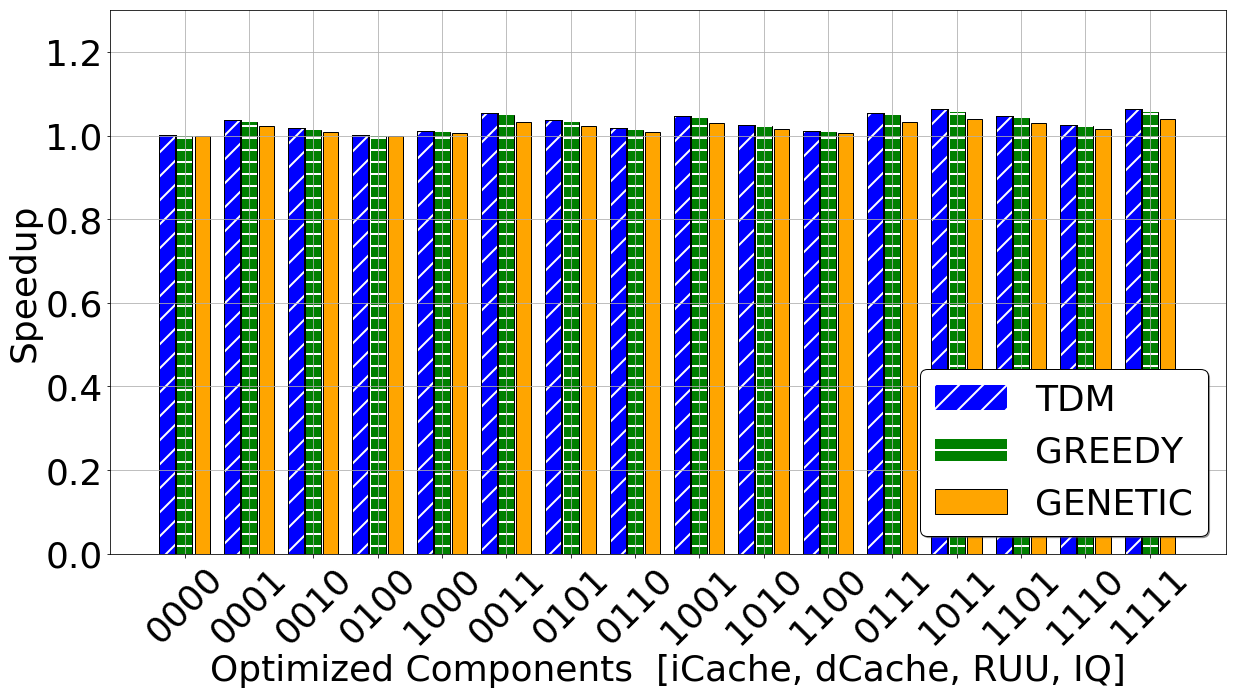

In [4]:
## taken from http://matplotlib.org/examples/api/barchart_demo.html
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

numBars = 16
## making the multiplier bigger reduces the size of bar's
index = 1.5*np.arange(numBars) # location of groups
width = 0.35 #width of each bar
space = 0.05

#fig, ax = plt.subplots()
#rect1 = ax.bar(index, TDM_OPT, width, color='b')
#rect2 = ax.bar(index+width, GREEDY_OPT, width, color='g')
#rect3 = ax.bar(index+2*width, GENERIC_OPT, width, color='r')
## Adding labels and titles
#ax.set_ylabel('Speed Up')
#ax.set_title('Speed up for various Methods')
#ax.set_xticks(index+1.5*width)
#ax.set_xticklabels(('0000', '0001', '0010', '0011',\
#                    '0100', '0101', '0110', '0111',\
#                    '1000', '1001', '1010', '1011',\
#                    '1100', '1101', '1110', '1111'))
#ax.legend((rect1[0], rect2[0], rect3[0]), ('TDM', 'GREEDY', 'GENERIC'))

## Setting hatching color
mpl.rcParams['hatch.color'] = 'white'
mpl.rcParams['hatch.linewidth'] = 2

fig = plt.figure(figsize=(20,10))
## edgecolor gives the color of the pattern
## hatch gives the pattern 
rect1 = plt.bar(index, TDM_OPT, width, color='white', edgecolor='k', linewidth=3)
rect1 = plt.bar(index, TDM_OPT, width, color='b' , hatch='/')

rect2 = plt.bar(index+width+space, GREEDY_OPT, width, color='white', edgecolor='k')
rect2= plt.bar(index+width+space, GREEDY_OPT, width, color='g', hatch='-')

rect3 = plt.bar(index+2*width+space*2, GENERIC_OPT, width, color='orange', edgecolor='k')
#rect3 = plt.bar(index+2*width+space*2, GENERIC_OPT, width, color='orange', hatch='.')


tickLabel = (('0000', '0001', '0010', '0100', '1000',\
            '0011', '0101', '0110', '1001', '1010', '1100',\
            '0111', '1011', '1101', '1110',\
            '1111'))

## Adding labels and titles
plt.ylabel('Speedup', fontsize=36)
plt.xlabel('Optimized Components  [iCache, dCache, RUU, IQ]', fontsize=36)

##title = 'Speed up of MCF,   Total iterations=' + str(N) + '   simulated for=' + str(NUMBER_OF_ITERATION) + ' times'
##plt.title(title)
plt.xticks(index+1.4*width-2*space, tickLabel, fontsize=36, rotation=45)
plt.yticks(fontsize=36)

plt.legend((rect1[0], rect2[0], rect3[0]), ('TDM', 'GREEDY', 'GENETIC'), fontsize=36, loc='lower right',\
           shadow=True, edgecolor='black')
plt.grid()

#Setting yaxis length to 1.3
axes = plt.gca()
axes.set_ylim([0, 1.3])
#print (axes.get_ylim())


plt.show()
## bbox_inches='tight' insures that the axis name is in the saved image.
fig.savefig(imgFile, bbox_inches = 'tight')